In [19]:
import pandas as pd #IMPORTING PANDAS
import matplotlib.pyplot as plt #importing matplot lib for visualizations
import numpy as np              #importing numpy library  
import geopandas as gpd        #importing Geopandas library
import seaborn as sns          #importing seaborn library for visualizatioN
from sklearn.cluster import KMeans #Kmeans clustering library
kmeans = KMeans(init='k-means++')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
import warnings
warnings.filterwarnings("ignore")

In [20]:
stu=pd.read_csv("C:/Users/vasuk/OneDrive/Desktop/Data mining/archive (13)/student-mat.csv") #read the csv file of student's database
stu.head(20) #print the first 20 values of the dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [21]:
stu.isna().sum() #Detecting the missing values and count the numbers

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [22]:
stu.shape  #return a tuple contains shape of the rows and columns dataframe

(395, 33)

In [23]:
stu.info   #Information of the dataset

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel fre

In [24]:
stu.duplicated().sum() #finding the duplicate values

0

In [25]:
stu.columns   #coulmns in dataset (33 columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

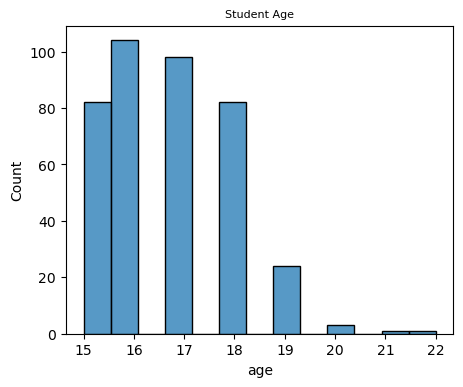

In [26]:
#visualization of students age from 17 to 22
plt.figure(figsize=(5, 4))
sns.histplot(stu["age"])
plt.title("Student Age",size=8)
plt.show()

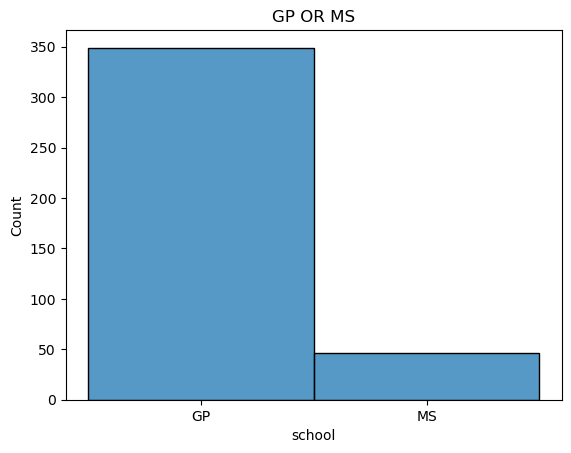

In [27]:
#visualizing the school of portugal)
sns.histplot(stu.school)
plt.title('GP OR MS')
plt.show()

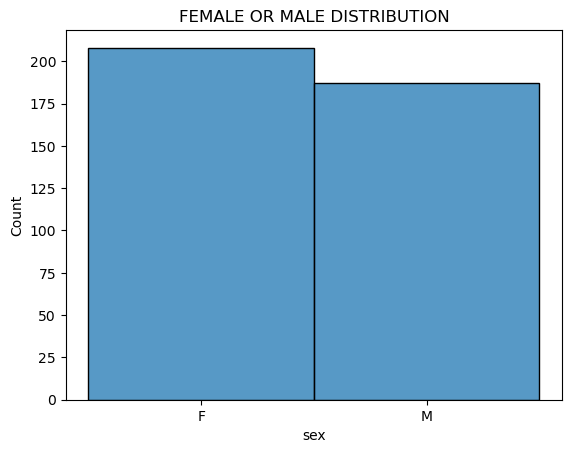

In [28]:
#visualization of sex in the dataset
sns.histplot(stu.sex)
plt.title('FEMALE OR MALE DISTRIBUTION')
plt.show()

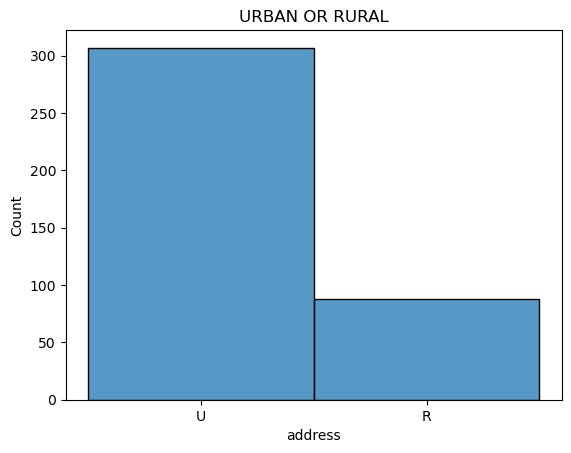

In [29]:
#visualizing the student's address
sns.histplot(stu.address)
plt.title('URBAN OR RURAL')
plt.show()

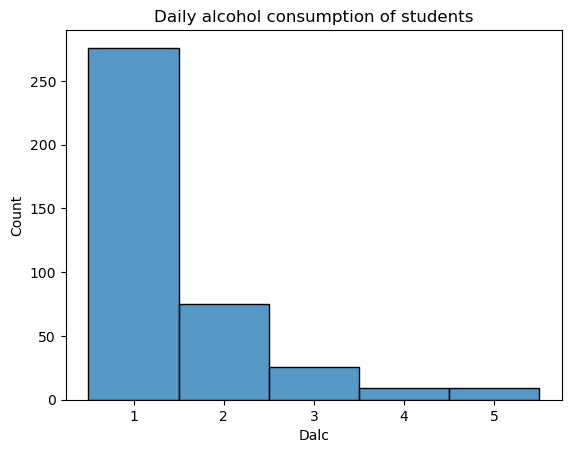

In [30]:
#visualizing daily consumption of alcohol of students
sns.histplot(stu.Dalc, discrete=True)
plt.title('Daily alcohol consumption of students')
plt.show()

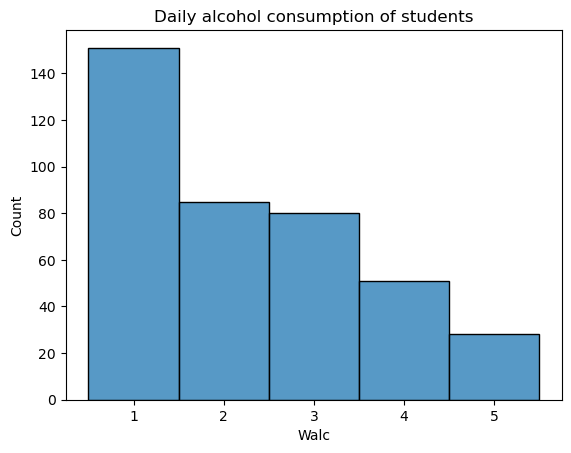

In [31]:
#visualizing weekly consumption of alcohol of students
sns.histplot(stu.Walc, discrete=True)
plt.title('Daily alcohol consumption of students')
plt.show()

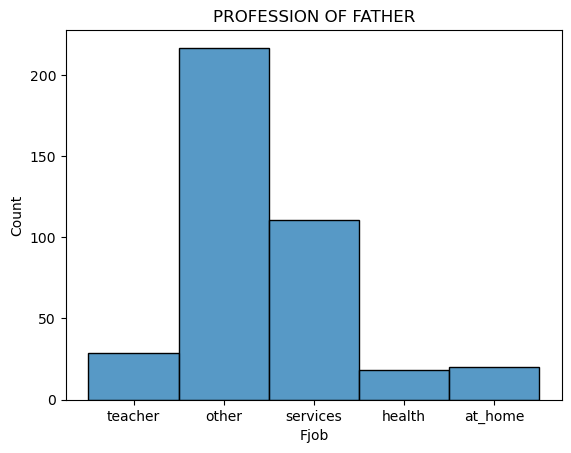

In [32]:
sns.histplot(stu.Fjob)
plt.title('PROFESSION OF FATHER')
plt.show()

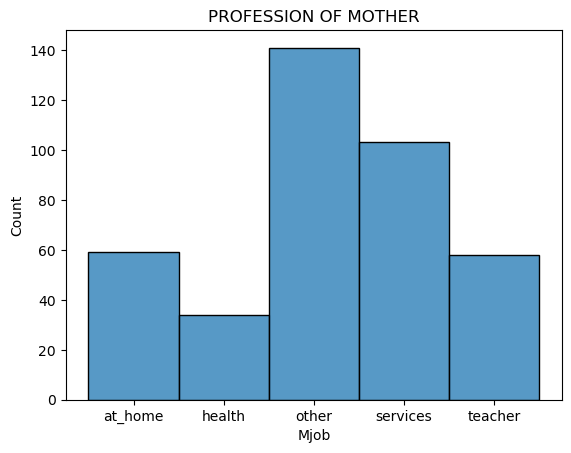

In [33]:
sns.histplot(stu.Mjob)
plt.title('PROFESSION OF MOTHER')
plt.show()

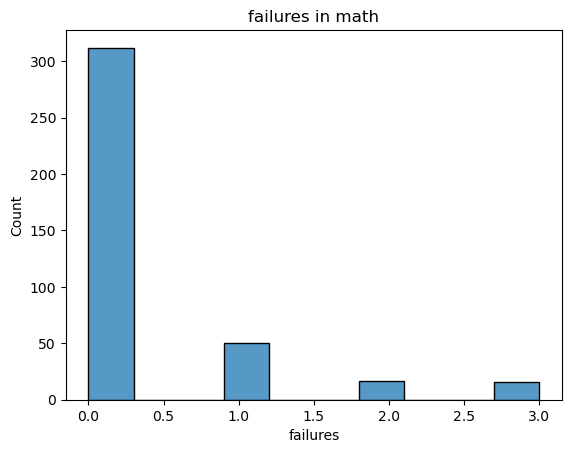

In [34]:
sns.histplot(stu.failures)
plt.title('failures in math')
plt.show()

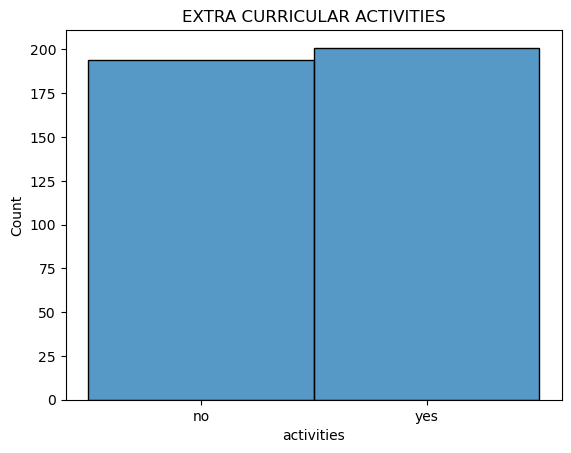

In [35]:
sns.histplot(stu.activities)
plt.title('EXTRA CURRICULAR ACTIVITIES')
plt.show()

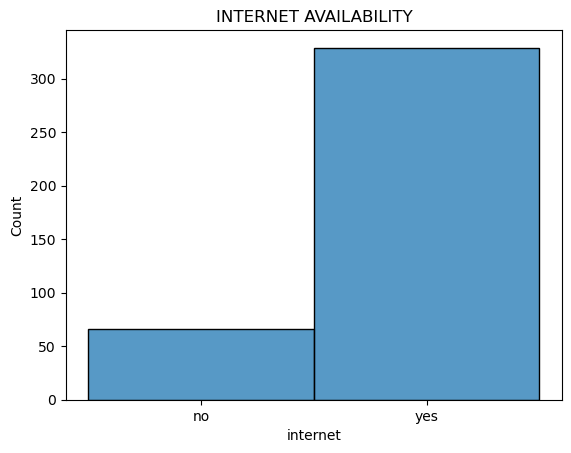

In [36]:
sns.histplot(stu.internet)
plt.title('INTERNET AVAILABILITY')
plt.show()

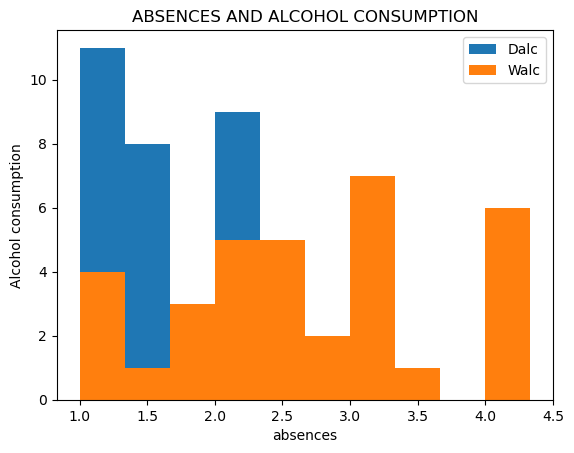

In [37]:
stu.groupby('absences')[['Dalc', 'Walc']].mean().plot(kind='hist')
plt.ylabel('Alcohol consumption')
plt.xlabel('absences')
plt.xticks(rotation=0)
plt.title('ABSENCES AND ALCOHOL CONSUMPTION')
plt.show()

In [55]:
stu['percent'] = (stu['Dalc'] / stu[''].sum()) * 100
stu

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Dalc,Walc,health,absences,G1,G2,G3,percent,mean_grade,academic_support
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,1,1,3,6,5,6,6,0.024307,5.666667,noyesyes
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,1,1,3,4,5,5,6,0.024307,5.333333,yesnoyes
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,3,3,10,7,8,10,0.048614,8.333333,noyesyes
3,GP,F,15,U,GT3,T,4,2,health,services,...,1,1,5,2,15,14,15,0.024307,14.666667,yesnoyes
4,GP,F,16,U,GT3,T,3,3,other,other,...,1,2,5,4,6,10,10,0.024307,8.666667,yesnoyes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,4,5,4,11,9,9,9,0.097229,9.000000,yesnoyes
391,MS,M,17,U,LE3,T,3,1,services,services,...,3,4,2,3,14,16,16,0.072922,15.333333,nonoyes
392,MS,M,21,R,GT3,T,1,1,other,other,...,3,3,3,3,10,8,7,0.072922,8.333333,nonoyes
393,MS,M,18,R,LE3,T,3,2,services,other,...,3,4,5,0,11,12,10,0.072922,11.000000,nonoyes


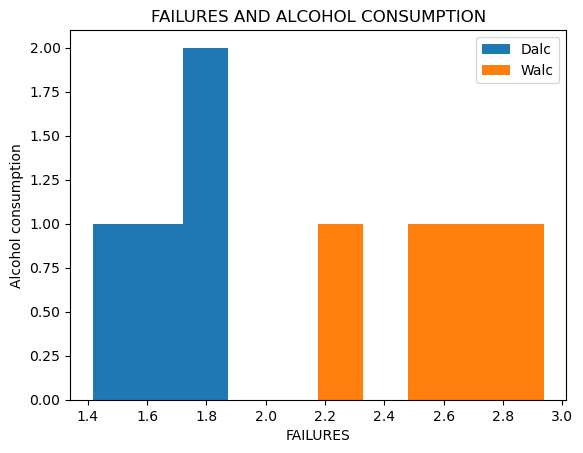

In [39]:
stu.groupby('failures')[['Dalc', 'Walc']].mean().plot(kind='hist')
plt.ylabel('Alcohol consumption')
plt.xlabel('FAILURES')
plt.xticks(rotation=0)
plt.title('FAILURES AND ALCOHOL CONSUMPTION')
plt.show()

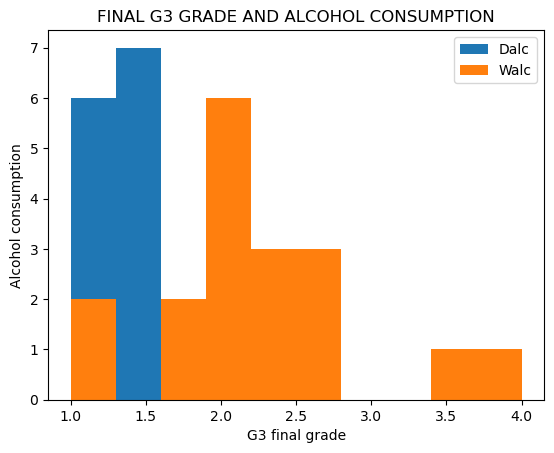

In [40]:
stu.groupby('G3')[['Dalc', 'Walc']].mean().plot(kind='hist')
plt.ylabel('Alcohol consumption')
plt.xlabel('G3 final grade')
plt.xticks(rotation=0)
plt.title('FINAL G3 GRADE AND ALCOHOL CONSUMPTION')
plt.show()

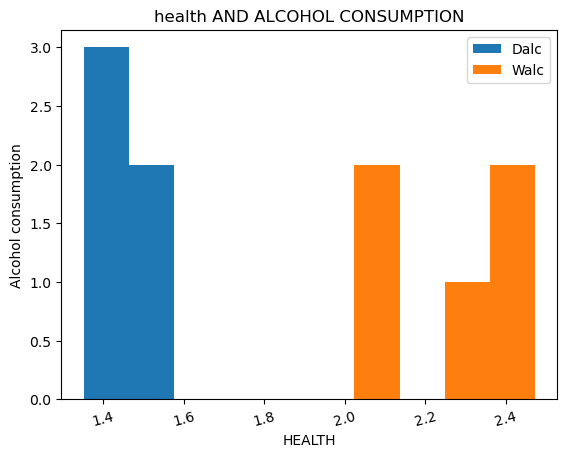

In [41]:
stu.groupby('health')[['Dalc', 'Walc']].mean().plot(kind='hist')
plt.xlabel('HEALTH')
plt.ylabel('Alcohol consumption')
plt.xticks(rotation=15)
plt.title('health AND ALCOHOL CONSUMPTION')
plt.show()

In [43]:
stu_fails = stu[stu.failures != 0]
stu_no_f = stu[stu.failures == 0]

per = (len(stu_no_f.index) / stu['age'].count() * 100)
ratio = str(round(per,2))

print('This education system has succeeded to educate their students to pass curriculum by '+ ratio +"%.")

This education system has succeeded to educate their students to pass curriculum by 78.99%.


In [45]:
stu['mean_grade'] = (stu.G1+stu.G2+stu.G3)/3

In [51]:
stu['academic_support'] = stu.famsup + stu.schoolsup  + stu.higher 

In [53]:
print("Descriptive Statistics :", '\n', ['schoolsup'].Describe())
print("Correlation with target var 'alc consumption' :", '\n', stu['academic_support'].corr(stu['alc']))
print("percentage of data distrib :", '\n', stu.academic_support.value_counts(normalize=True))

fig, ax = plt.subplots(1, 2, figsize= (10,6))
sns.despine(right=True)
sns.countplot(x="academic_support", data=stu,  ax = ax[0])
sns.barplot(x="academic_support",  y ='alc', data=stu,  ax = ax[1])

AttributeError: 'list' object has no attribute 'Describe'

In [420]:
stu.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,mean_grade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679325
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696786
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.333333
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.333333
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.666667
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.333333
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.333333


In [287]:
stu['G3'].mean()

10.415189873417722

In [288]:
stu['mean_grade'].mean()

10.679324894514782

In [299]:
#Rows tell you the number of rows and columns tell you the number of features
print('Rows and Columns :', stu.shape,'\n' ) 
print('INFO:') #Running info on the dataset to check on the any missing values and data
print(stu.info(), '\n')
print('Unique Values :','\n', stu.nunique(), '\n')# the number of unique values in each column in dataset

Rows and Columns : (395, 35) 

INFO:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     395 non-null    object 
 4   famsize     395 non-null    object 
 5   Pstatus     395 non-null    object 
 6   Medu        395 non-null    int64  
 7   Fedu        395 non-null    int64  
 8   Mjob        395 non-null    object 
 9   Fjob        395 non-null    object 
 10  reason      395 non-null    object 
 11  guardian    395 non-null    object 
 12  traveltime  395 non-null    int64  
 13  studytime   395 non-null    int64  
 14  failures    395 non-null    int64  
 15  schoolsup   395 non-null    object 
 16  famsup      395 non-null    object 
 17  paid        395 non-null    object 
 18  activities  395 non-null    objec

In [296]:
stu['Dalc'].value_counts(normalize=True)

1    0.698734
2    0.189873
3    0.065823
5    0.022785
4    0.022785
Name: Dalc, dtype: float64

In [213]:
#converting into numeric values
stu.loc[stu['school']=='GP', 'school'] = 1
stu.loc[stu['school']=='MS', 'school'] = 0
stu.loc[stu['sex']=='F', 'sex'] = 1
stu.loc[stu['sex']=='M', 'sex'] = 0
stu.loc[stu['address']=='R', 'address'] = 1
stu.loc[stu['address']=='U', 'address'] = 0
stu.loc[stu['famsize']=='GT3', 'famsize'] = 1
stu.loc[stu['famsize']=='LE3', 'famsize'] = 0
stu.loc[stu['Pstatus']=='T', 'Pstatus'] = 1
stu.loc[stu['Pstatus']=='A', 'Pstatus'] = 0
stu.loc[stu['schoolsup']=='yes', 'schoolsup'] = 1
stu.loc[stu['schoolsup']=='no', 'schoolsup'] = 0
stu.loc[stu['famsup']=='yes', 'famsup'] = 1
stu.loc[stu['famsup']=='no', 'famsup'] = 0
stu.loc[stu['paid']=='yes', 'paid'] = 1
stu.loc[stu['paid']=='no', 'paid'] = 0
stu.loc[stu['activities']=='yes', 'activities'] = 1
stu.loc[stu['activities']=='no', 'activities'] = 0
stu.loc[stu['nursery']=='yes', 'nursery'] = 1
stu.loc[stu['nursery']=='no', 'nursery'] = 0
stu.loc[stu['higher']=='yes', 'higher'] = 1
stu.loc[stu['higher']=='no', 'higher'] = 0
stu.loc[stu['internet']=='yes', 'internet'] = 1
stu.loc[stu['internet']=='no', 'internet'] =0
stu.loc[stu['romantic']=='yes', 'romantic'] = 1
stu.loc[stu['romantic']=='no', 'romantic'] = 0

In [305]:
#conversion of numeric values
conditions=[stu['Mjob'] == 'at_home',
          stu['Mjob'] == 'services',
          stu['Mjob'] == 'teacher',
          stu['Mjob'] == 'health',
           stu['Mjob']== 'other']
choices = [1,2,3,4,5]
stu['Mjob'] = np.select(conditions, choices)

conditions=[stu['Fjob'] == 'at_home',
          stu['Fjob'] == 'services',
          stu['Fjob'] == 'teacher',
          stu['Fjob'] == 'health',
           stu['Fjob']== 'other']
choices = [1,2,3,4,5]
stu['Fjob'] = np.select(conditions, choices)

conditions=[stu['reason'] == 'home',
          stu['reason'] == 'reputation',
          stu['reason'] == 'course',
           stu['reason']== 'other']
choices = [1,2,3,4]
stu['reason'] = np.select(conditions, choices)

conditions=[stu['guardian'] == 'father',
          stu['guardian'] == 'mother',
          stu['guardian'] == 'other']
choices = [1,2,3]
stu['guardian'] = np.select(conditions, choices)

In [422]:
stu.dtypes

school         object
sex            object
age             int64
address        object
famsize        object
Pstatus        object
Medu            int64
Fedu            int64
Mjob           object
Fjob           object
reason         object
guardian       object
traveltime      int64
studytime       int64
failures        int64
schoolsup      object
famsup         object
paid           object
activities     object
nursery        object
higher         object
internet       object
romantic       object
famrel          int64
freetime        int64
goout           int64
Dalc            int64
Walc            int64
health          int64
absences        int64
G1              int64
G2              int64
G3              int64
mean_grade    float64
dtype: object

In [423]:
stu['weekly basis alcoholism']= stu['Dalc']+stu['Walc']
stu['weekly basis alcoholism'].value_counts()

2     150
3      66
4      60
5      45
6      35
7      17
10      9
8       9
9       4
Name: weekly basis alcoholism, dtype: int64

0    321
1     74
Name: alc, dtype: int64
0    0.812658
1    0.187342
Name: alc, dtype: float64


Text(0.5, 1.0, 'Binge drinkers vs light drinkers')

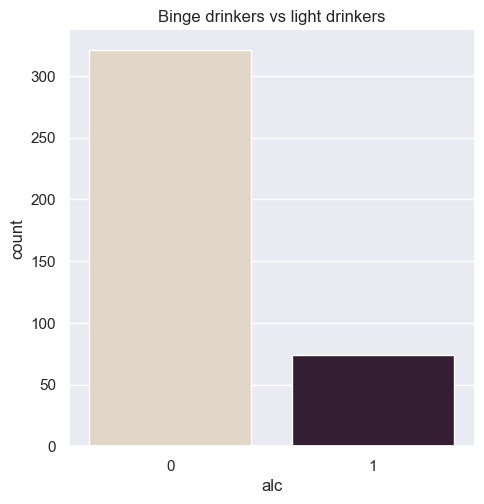

In [428]:
stu['alc'] = [0 if x <= 5 else 1 for x in stu['weekly basis alcoholism']]
        
print(stu['alc'].value_counts())
print(stu['alc'].value_counts(normalize = True))

sns.catplot(x="alc", kind="count", palette="ch:.25", data=stu)
plt.title('Binge drinkers vs light drinkers')

In [430]:
stu.isna().any()  #not a number values

school                     False
sex                        False
age                        False
address                    False
famsize                    False
Pstatus                    False
Medu                       False
Fedu                       False
Mjob                       False
Fjob                       False
reason                     False
guardian                   False
traveltime                 False
studytime                  False
failures                   False
schoolsup                  False
famsup                     False
paid                       False
activities                 False
nursery                    False
higher                     False
internet                   False
romantic                   False
famrel                     False
freetime                   False
goout                      False
Dalc                       False
Walc                       False
health                     False
absences                   False
G1        

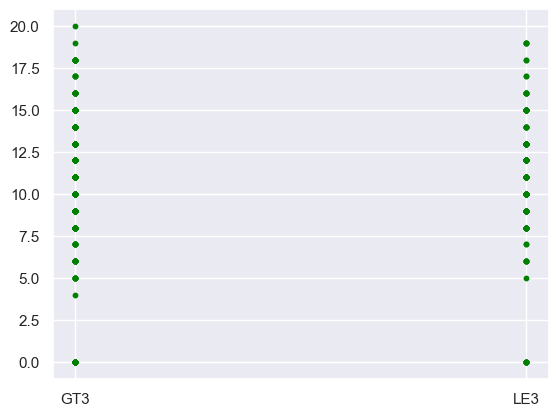

In [438]:
famsize= stu['famsize'].values
Grade = stu['G3'].values
X = np.array(list(zip(famsize, Grade)))
plt.scatter(famsize, Grade, c='green', s=10)


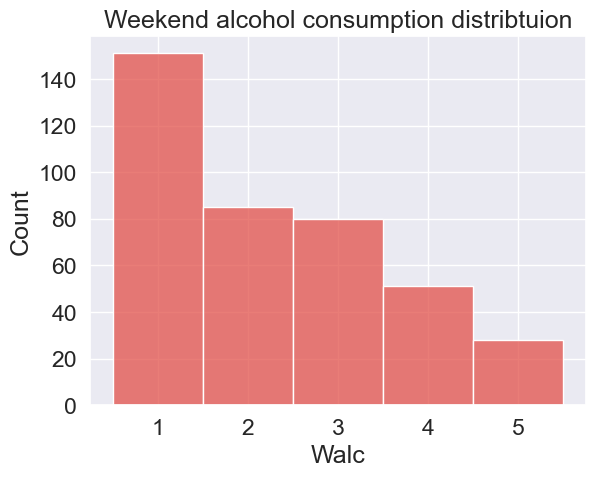

In [307]:
sns.histplot(stu.Walc, discrete=True)
plt.title('Weekend alcohol consumption distribtuion')
plt.show()

In [308]:
stu['Walc'].value_counts(normalize=True)

1    0.382278
2    0.215190
3    0.202532
4    0.129114
5    0.070886
Name: Walc, dtype: float64

In [309]:
df = ['age', 'address', 'famsize', 'Pstatus', 
        'Medu', 'Fedu', 'studytime', 'schoolsup',
        'famsup', 'paid', 'activities', 'internet',
        'romantic', 'famrel', 'freetime', 'goout',
        'Dalc', 'Walc', 'traveltime', 'G3']
stu = stu[df]
stu

,age,address,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,Dalc,Walc,traveltime,G3
0,18,U,GT3,A,4,4,2,yes,no,no,no,no,no,4,3,4,1,1,2,6
1,17,U,GT3,T,1,1,2,no,yes,no,no,yes,no,5,3,3,1,1,1,6
2,15,U,LE3,T,1,1,2,yes,no,yes,no,yes,no,4,3,2,2,3,1,10
3,15,U,GT3,T,4,2,3,no,yes,yes,yes,yes,yes,3,2,2,1,1,1,15
4,16,U,GT3,T,3,3,2,no,yes,yes,no,no,no,4,3,2,1,2,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,LE3,A,2,2,2,no,yes,yes,no,no,no,5,5,4,4,5,1,9
391,17,U,LE3,T,3,1,1,no,no,no,no,yes,no,2,4,5,3,4,2,16
392,21,R,GT3,T,1,1,1,no,no,no,no,no,no,5,5,3,3,3,1,7
393,18,R,LE3,T,3,2,1,no,no,no,no,yes,no,4,4,1,3,4,3,10


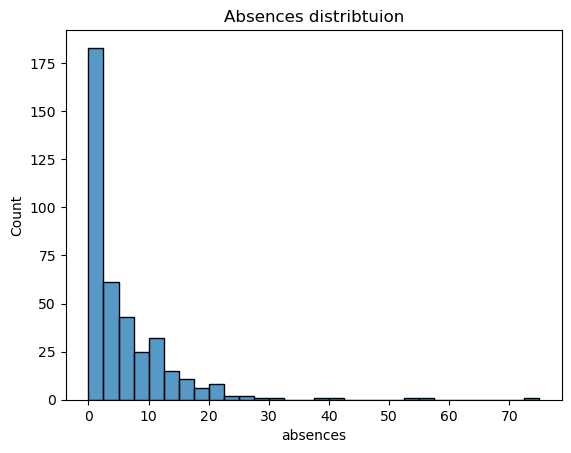

In [84]:
sns.histplot(stu['absences'], bins=30)
plt.title('Absences distribtuion')
plt.show()

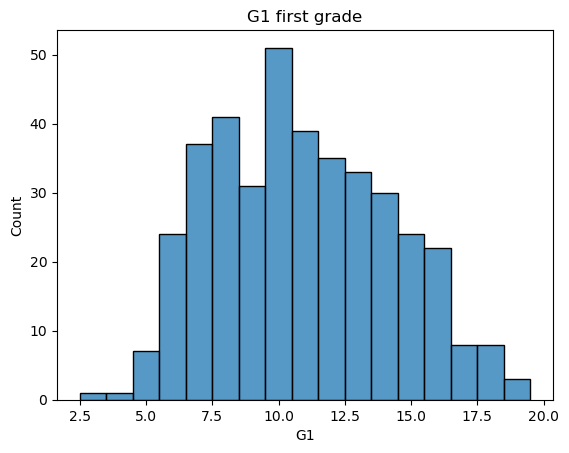

In [89]:
sns.histplot(stu['G1'], discrete=True)
plt.title('G1 first grade')
plt.show()

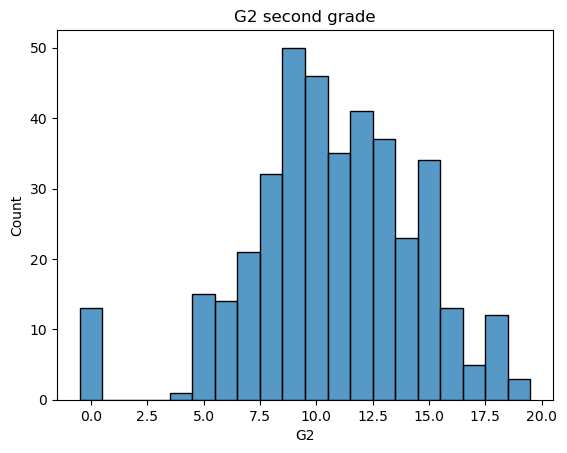

In [90]:
sns.histplot(stu['G2'], discrete=True)
plt.title('G2 second grade')
plt.show()

In [310]:
stu

,age,address,famsize,Pstatus,Medu,Fedu,studytime,schoolsup,famsup,paid,activities,internet,romantic,famrel,freetime,goout,Dalc,Walc,traveltime,G3
0,18,U,GT3,A,4,4,2,yes,no,no,no,no,no,4,3,4,1,1,2,6
1,17,U,GT3,T,1,1,2,no,yes,no,no,yes,no,5,3,3,1,1,1,6
2,15,U,LE3,T,1,1,2,yes,no,yes,no,yes,no,4,3,2,2,3,1,10
3,15,U,GT3,T,4,2,3,no,yes,yes,yes,yes,yes,3,2,2,1,1,1,15
4,16,U,GT3,T,3,3,2,no,yes,yes,no,no,no,4,3,2,1,2,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,U,LE3,A,2,2,2,no,yes,yes,no,no,no,5,5,4,4,5,1,9
391,17,U,LE3,T,3,1,1,no,no,no,no,yes,no,2,4,5,3,4,2,16
392,21,R,GT3,T,1,1,1,no,no,no,no,no,no,5,5,3,3,3,1,7
393,18,R,LE3,T,3,2,1,no,no,no,no,yes,no,4,4,1,3,4,3,10


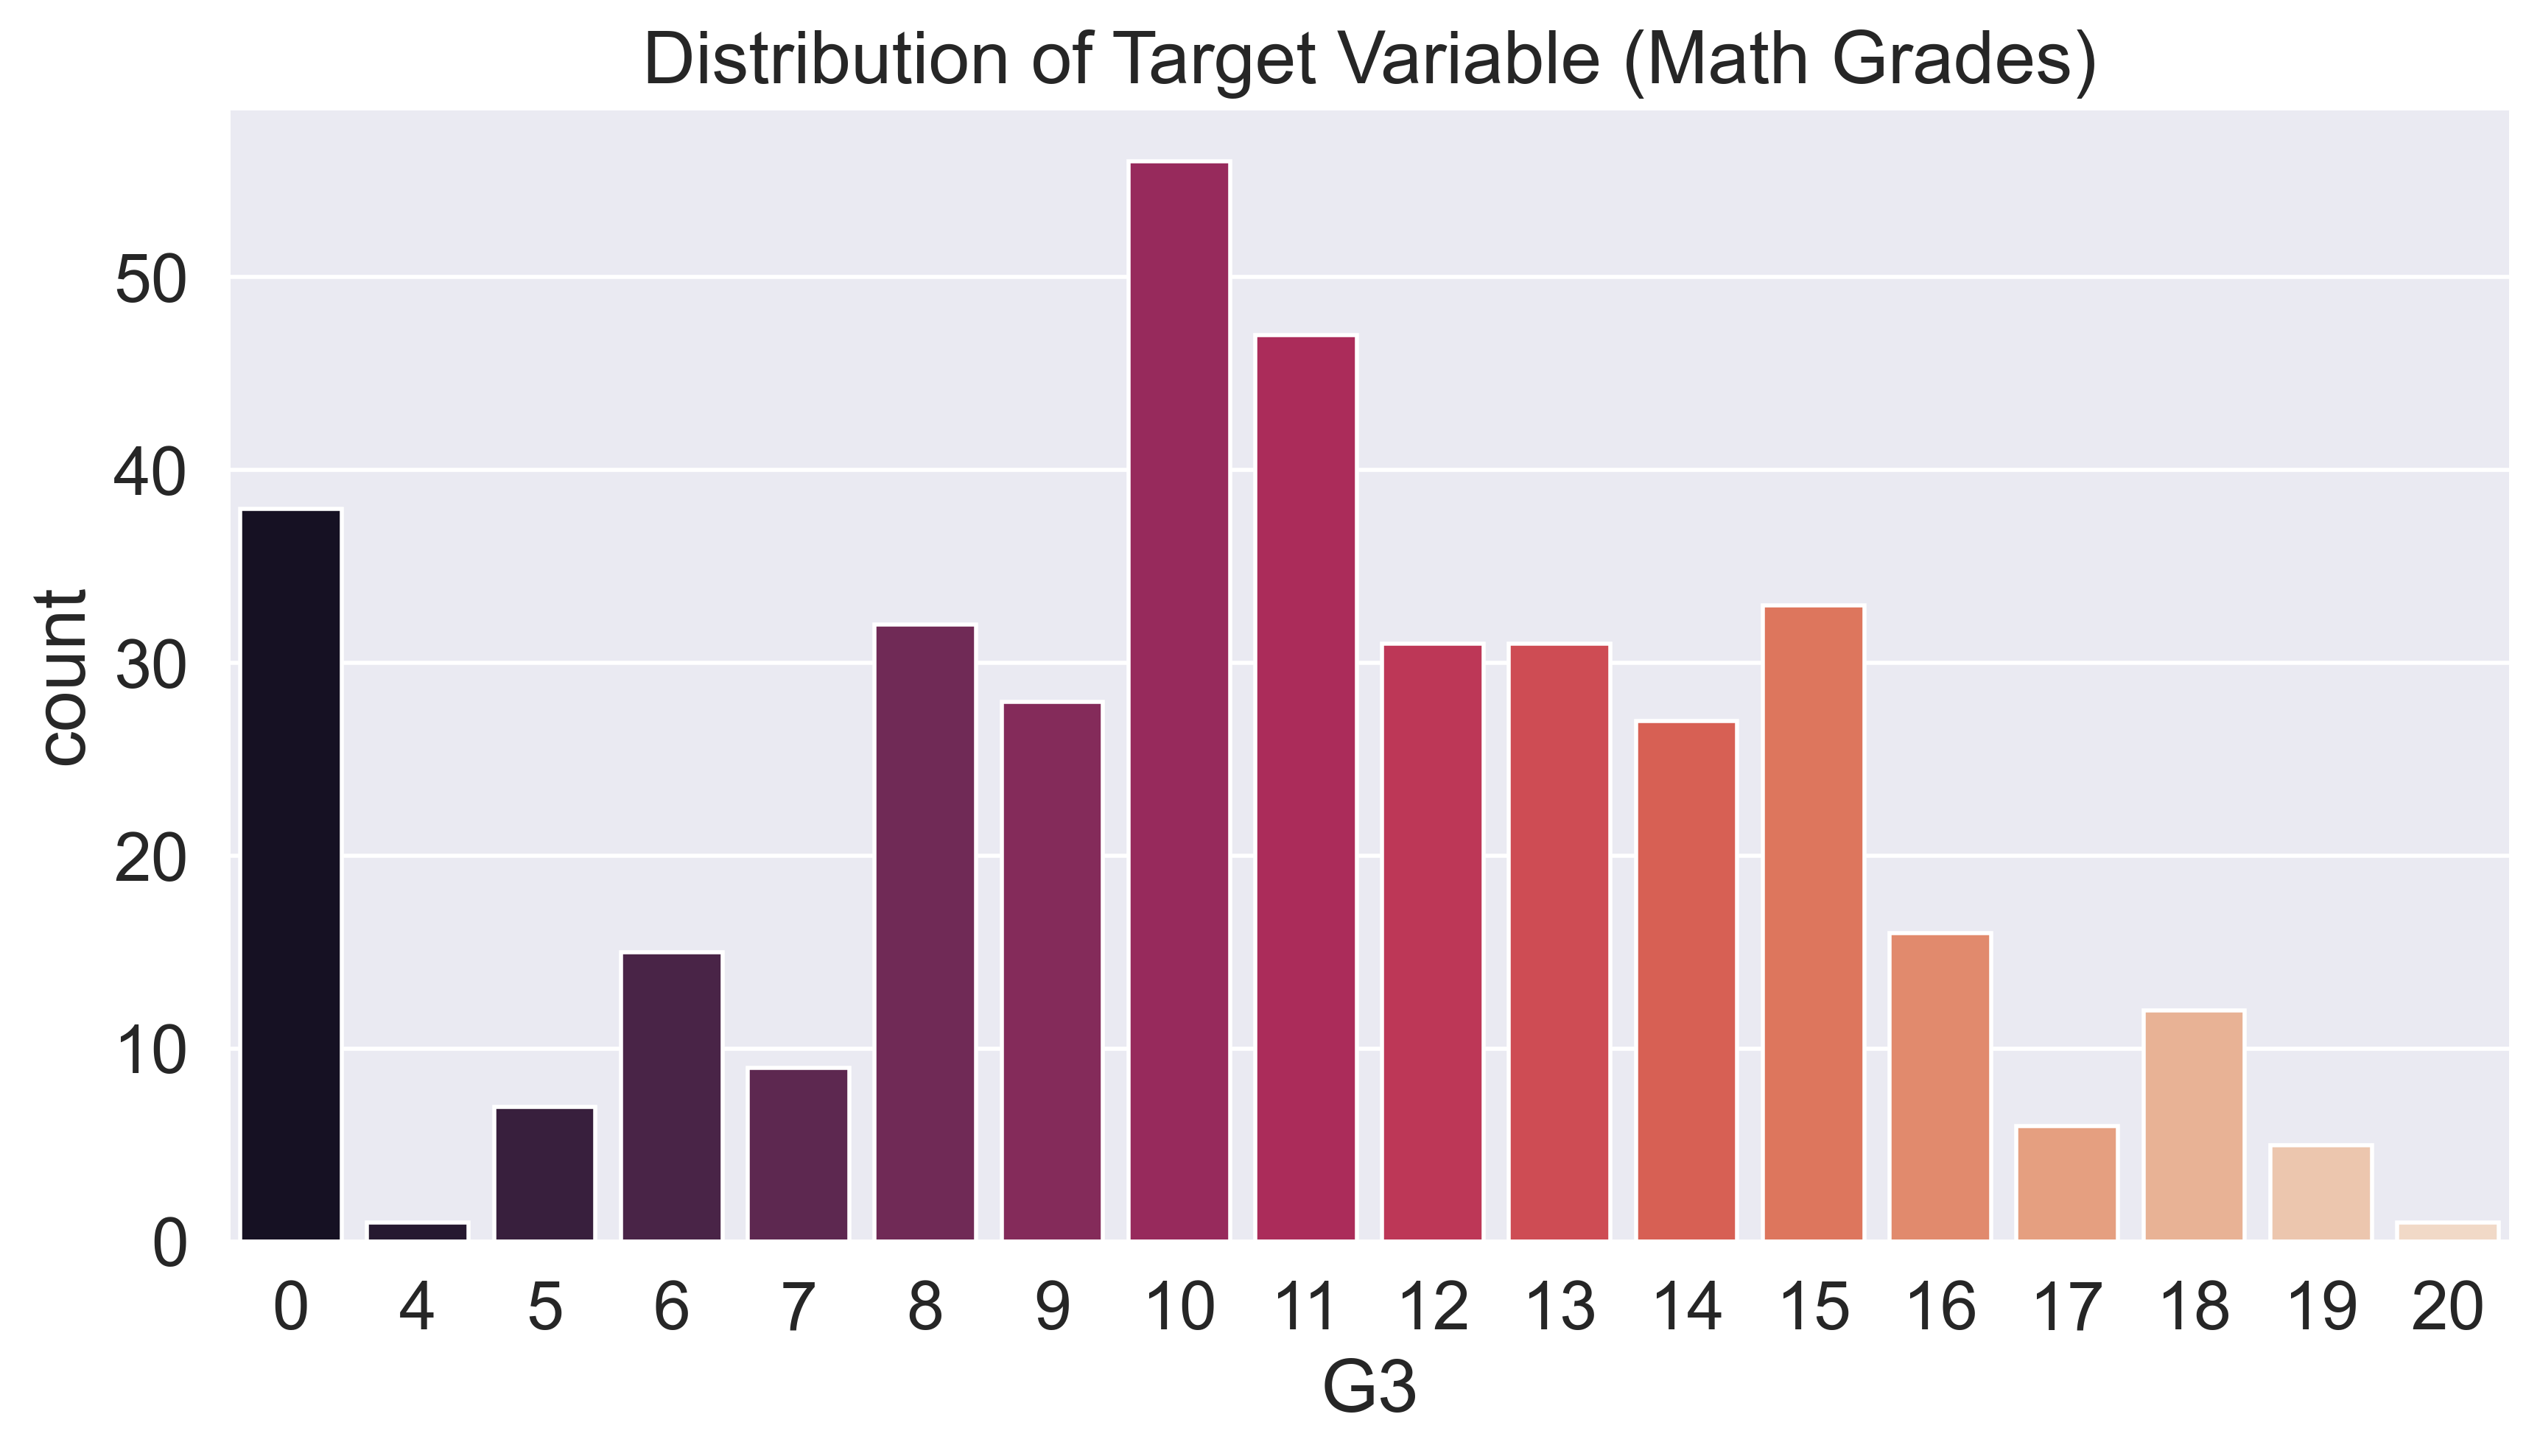

In [314]:
plt.figure(figsize=(10, 5), dpi=400)
sns.countplot(x = stu['G3'], palette='rocket')
ax = plt.gca()
ax.grid(which='major', axis='y', linestyle='-')
plt.title('Distribution of Target Variable (Math Grades)')
plt.show()

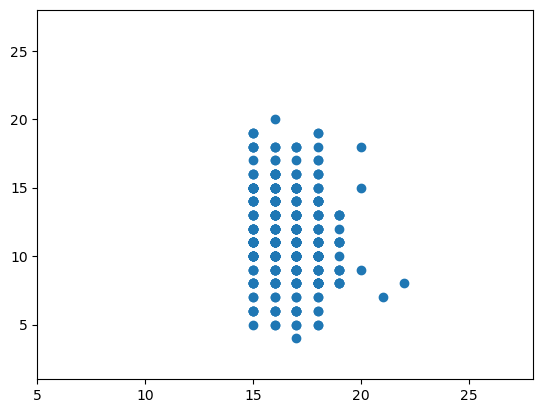

In [75]:
plt.scatter(stu['age'],stu['G3'])
plt.xlim(5,28)
plt.ylim(1,28)
plt.show()

In [79]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = stu[['Walc']]
X_axis = stu[['Dalc']]
Sshool = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))] # 
plt.plot(K_clusters, school)
plt.xlabel('WEEKLY OF THE STUDENTS')
plt.ylabel('DAILY ALCOHOLIC')
plt.title('Elbow Curve')
plt.show()

NameError: name 'school' is not defined

In [358]:
x=stu.iloc[:,[2,3]].values

In [365]:
df1 = stu[['age', 'G3']].copy()

In [368]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df1)

In [377]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)

In [378]:
sns.set()

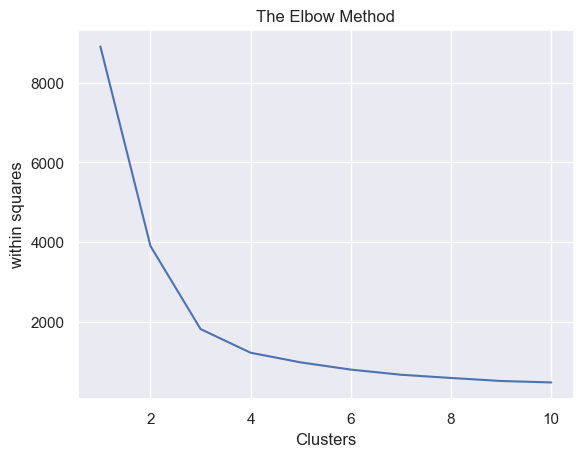

In [380]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('within squares')
plt.show()

In [381]:
from sklearn.mixture import GaussianMixture

In [382]:
from sklearn.mixture import GaussianMixture
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(df1)

GaussianMixture(n_components=3)

In [384]:
cluster_labels = gmm_model.predict(df1)
df1 = pd.DataFrame(df1)
df1['cluster'] = cluster_labels

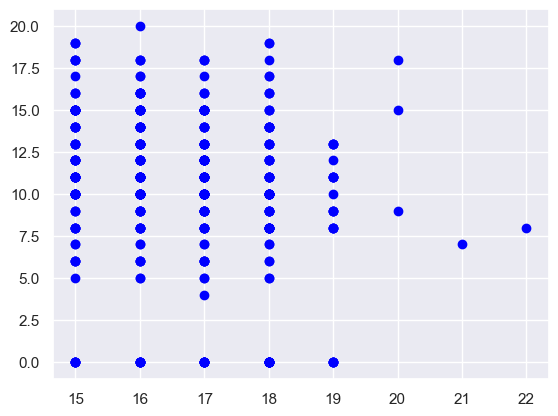

In [393]:
for k in range(0,n_clusters):
    data = df1[df1["cluster"]==k]
    plt.scatter(data["age"],data["G3"],c='blue')

In [397]:
print(kmeans.labels_)

[7 7 0 2 0 2 0 7 5 2 4 9 9 0 2 2 2 0 7 0 2 2 2 9 4 4 0 2 0 0 9 5 2 9 2 7 5
 2 0 9 0 9 5 0 4 7 0 5 9 4 9 9 0 0 9 0 2 2 4 2 0 0 4 4 0 2 9 7 4 2 2 0 7 2
 0 0 0 0 0 7 9 0 7 2 0 4 7 9 0 4 4 5 7 0 9 0 2 0 2 4 7 5 9 7 5 0 4 5 9 2 5
 0 9 5 4 2 9 9 3 9 2 2 9 9 4 9 0 3 1 5 1 1 6 0 1 1 1 1 9 2 1 4 0 9 1 0 1 0
 1 0 1 2 0 1 6 4 6 8 2 9 1 4 1 0 7 9 0 2 1 2 1 2 0 1 4 3 0 7 4 0 4 9 5 3 9
 0 0 2 3 0 9 3 3 0 2 2 2 0 5 0 2 0 0 7 0 3 4 9 0 7 3 6 2 3 0 2 7 3 3 0 7 1
 5 6 2 3 2 6 3 6 6 0 3 9 7 0 6 9 0 1 6 6 1 9 1 5 6 3 7 2 3 0 3 4 6 3 6 8 6
 1 5 3 6 3 1 5 0 8 8 1 3 6 8 6 0 6 3 3 3 8 3 0 6 8 0 0 5 6 6 2 8 2 6 5 6 0
 1 3 6 2 8 0 6 5 6 6 5 3 6 8 1 6 8 8 6 8 1 3 0 8 6 3 0 2 2 8 2 0 3 6 3 6 1
 1 1 2 6 1 5 0 8 1 2 1 8 6 2 3 2 6 3 6 3 3 0 3 6 0 8 2 6 6 8 2 6 8 6 1 8 8
 3 6 0 7 5 8 6 8 2 0 6 3 0 1 7 8 7 1 3 1 3 2 3 8 3]


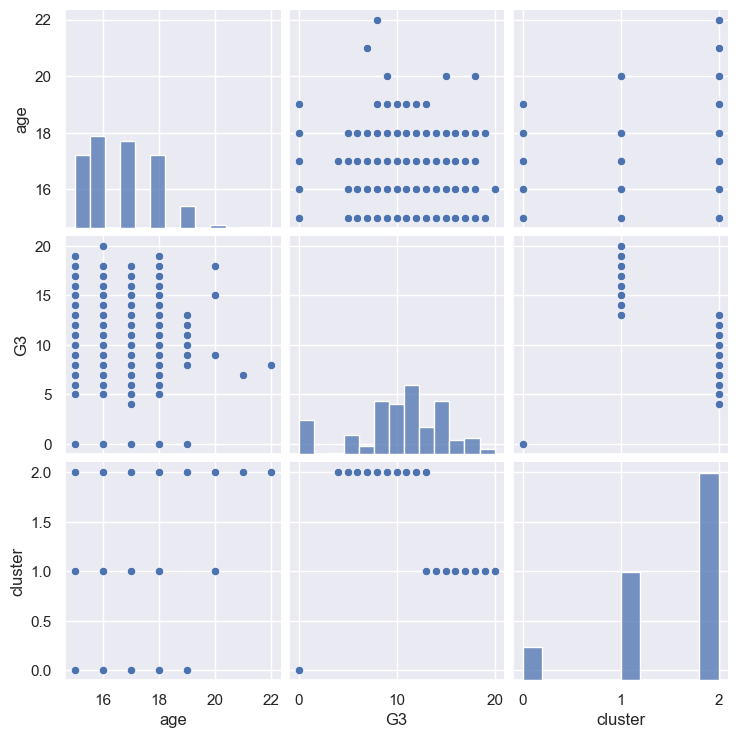

In [400]:
sns.pairplot(df1)

In [439]:
from scipy.cluster.hierarchy import linkage,cut_tree
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from sklearn.metrics.pairwise import euclidean_distances

In [440]:
method=['average','centroid','ward','weighted','median']
for i in method:
    mergings=linkage(df1,method=i,metric='euclidean')
    ed=euclidean_distances(df1)
    distance_array=ed[np.triu_indices(df1.shape[0],k=1)]
    coef,cophenet_distance=cophenet(mergings,distance_array)
    print('The cophenet coefficient is',coef,'for the method',i)

The cophenet coefficient is 0.8424224552530065 for the method average
The cophenet coefficient is 0.8424144237138613 for the method centroid
The cophenet coefficient is 0.7889015988193281 for the method ward
The cophenet coefficient is 0.5642262481314225 for the method weighted
The cophenet coefficient is 0.5369659435168603 for the method median


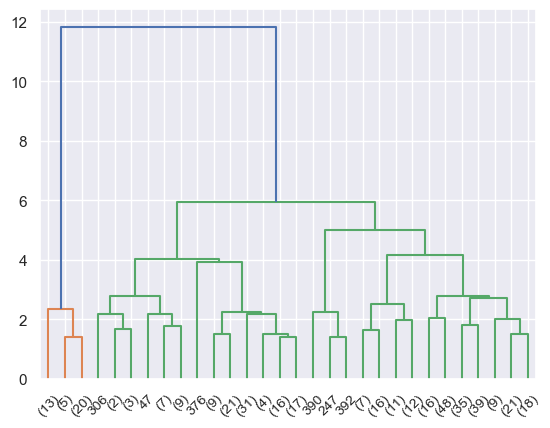

In [441]:
mergings=linkage(df1,method='average',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [442]:
from sklearn.cluster import AgglomerativeClustering

In [443]:
Agglo=AgglomerativeClustering(n_clusters=2)
Agglo.fit(df1)

AgglomerativeClustering()

In [446]:
df_Agglo=stu.copy()

In [449]:
df_Agglo['Cluster_Agglo']=Agglo

In [451]:
df_Agglo['Cluster_Agglo'].value_counts()

AgglomerativeClustering()    395
Name: Cluster_Agglo, dtype: int64

In [452]:
from sklearn.neighbors import NearestNeighbors

In [453]:
Nearest_Neighbors=NearestNeighbors(n_neighbors=10)
Nearest_Neighbors.fit(df1)
distances,indices=Nearest_Neighbors.kneighbors(df1)

In [454]:
distances.shape,indices.shape

((395, 10), (395, 10))

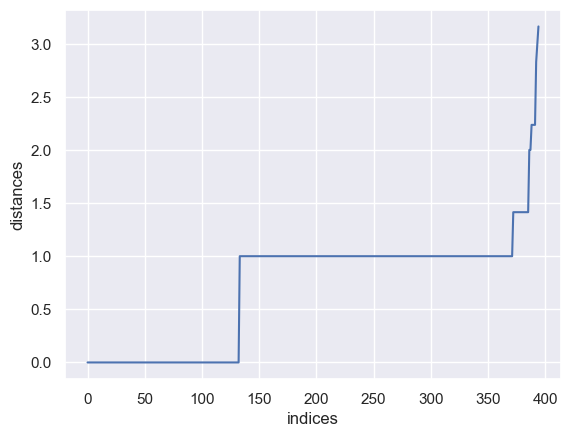

In [455]:
distances=distances[:,9]
distances=np.sort(distances,axis=0)
plt.plot(distances)
plt.xlabel('indices')
plt.ylabel('distances')
plt.show()

In [483]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [500]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(df1)

In [18]:
db = DBSCAN(eps=0.3, min_samples=10).fit(df1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels , labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels, labels)
)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1, labels))

NameError: name 'DBSCAN' is not defined

In [17]:
#DBSCAN 
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


NameError: name 'labels' is not defined